<a href="https://colab.research.google.com/github/prathik-codoc/Brain-MRI-AI/blob/main/BrainMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awsaf49/brats2020-training-data")

print("Path to dataset files:", path)

100%|██████████| 6.76G/6.76G [01:07<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3


In [2]:
pip install nibabel numpy


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data"

# Check if dataset exists
if os.path.exists(dataset_path):
    print("✅ Dataset found at:", dataset_path)
    # List first 10 files
    print("📂 Dataset files:", os.listdir(dataset_path)[:10])
else:
    print("❌ Dataset not found! Check your download path.")


✅ Dataset found at: /root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data
📂 Dataset files: ['content']


In [4]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data"

# Recursively list all files and folders
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Folder: {root}")
    for file in files[:10]:  # Show only first 10 files per folder
        print(f"  📄 {file}")


📂 Folder: /root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data
📂 Folder: /root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content
📂 Folder: /root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data
  📄 volume_74_slice_67.h5
  📄 volume_327_slice_121.h5
  📄 volume_205_slice_7.h5
  📄 volume_320_slice_34.h5
  📄 volume_91_slice_132.h5
  📄 volume_359_slice_82.h5
  📄 volume_112_slice_10.h5
  📄 volume_322_slice_145.h5
  📄 volume_227_slice_101.h5
  📄 volume_248_slice_60.h5


In [5]:
import h5py
import numpy as np

# Path to a sample .h5 file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"

# Open the HDF5 file and check its structure
with h5py.File(h5_file, 'r') as f:
    print("📂 HDF5 File Keys:", list(f.keys()))

    # Extract the first dataset
    key = list(f.keys())[0]  # Get first key
    data = f[key][()]  # Load data

    print(f"🧠 Data Shape: {data.shape}, Data Type: {data.dtype}")
    print(f"🔍 Min: {data.min()}, Max: {data.max()}, Mean: {np.mean(data)}")


📂 HDF5 File Keys: ['image', 'mask']
🧠 Data Shape: (240, 240, 4), Data Type: float64
🔍 Min: -0.6125135866228842, Max: 4.9496514079782585, Mean: -1.1842378929335004e-17


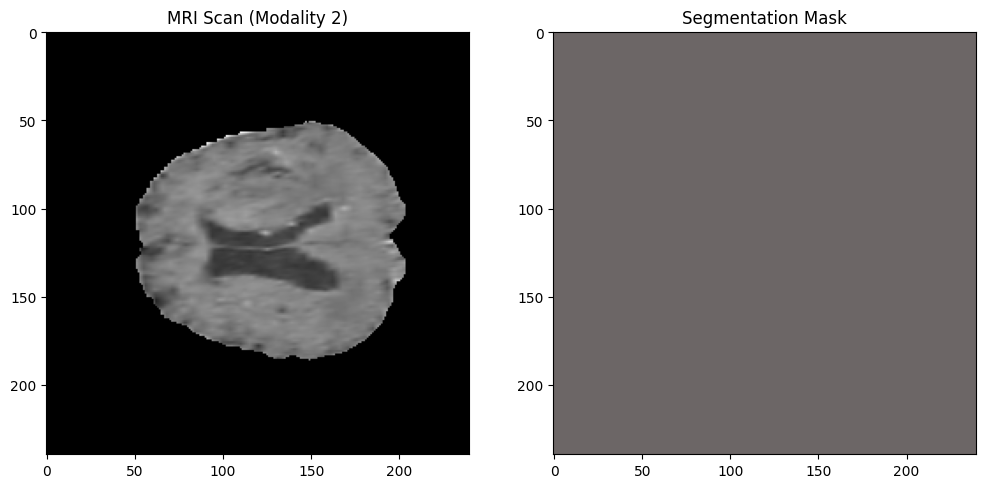

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the HDF5 file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"

with h5py.File(h5_file, 'r') as f:
    image = f['image'][()]  # Load MRI image
    mask = f['mask'][()]  # Load segmentation mask

# Choose a modality to visualize (T1, T1ce, T2, or FLAIR)
modality_idx = 2  # Change between 0-3 to see different MRI types

# Plot MRI scan and its corresponding mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image[:, :, modality_idx], cmap='gray')
axes[0].set_title(f"MRI Scan (Modality {modality_idx})")

axes[1].imshow(mask[:, :, 0], cmap='hot', alpha=0.6)  # Assuming the mask has a single channel
axes[1].set_title("Segmentation Mask")

plt.show()


In [7]:
import h5py
import numpy as np

# Load the HDF5 file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"

with h5py.File(h5_file, 'r') as f:
    mask = f['mask'][()]  # Load segmentation mask

# Print unique values in the mask
unique_values = np.unique(mask)
print("🎭 Unique Mask Values:", unique_values)


🎭 Unique Mask Values: [0 1]


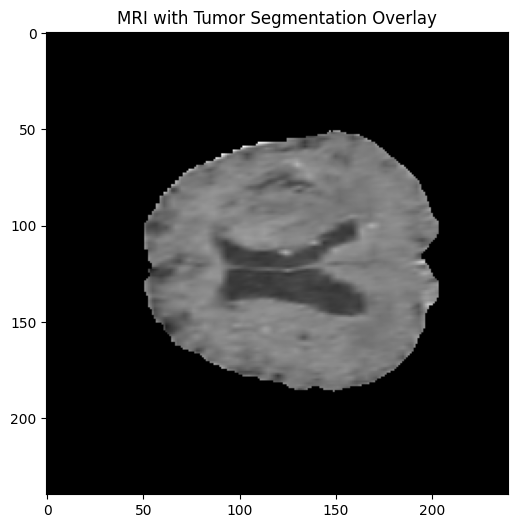

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load the HDF5 file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"

with h5py.File(h5_file, 'r') as f:
    image = f['image'][()]  # Load MRI scan
    mask = f['mask'][()]  # Load segmentation mask

# Choose a modality (0 = T1, 1 = T1ce, 2 = T2, 3 = FLAIR)
modality_idx = 2

# Normalize MRI scan to range [0, 1]
image = image[:, :, modality_idx]
image = exposure.rescale_intensity(image, out_range=(0, 1))  # Improve contrast

# Ensure mask is binary (0s and 1s)
mask = mask[:, :, 0]
mask = (mask > 0).astype(np.uint8)  # Convert to binary (0 or 1)

# Force the mask to be visible
mask_visible = np.ma.masked_where(mask == 0, mask)  # Hide background (0s)

# Plot MRI scan with a clearly visible tumor mask
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')  # Display MRI
ax.imshow(mask_visible, cmap='Reds', alpha=0.7)  # Overlay mask in red
ax.set_title("MRI with Tumor Segmentation Overlay")
plt.show()


In [9]:
import h5py
import numpy as np

# Load the HDF5 file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"

with h5py.File(h5_file, 'r') as f:
    mask = f['mask'][()]  # Load segmentation mask

# Find a slice that contains a tumor
nonzero_slices = np.where(mask.sum(axis=(0, 1)) > 0)[0]

if len(nonzero_slices) > 0:
    print(f"✅ Tumor found in slices: {nonzero_slices}")
    best_slice = nonzero_slices[len(nonzero_slices) // 2]  # Pick middle slice
    print(f"🎯 Selecting slice: {best_slice}")
else:
    print("❌ No tumor found in this scan!")


✅ Tumor found in slices: [1]
🎯 Selecting slice: 1


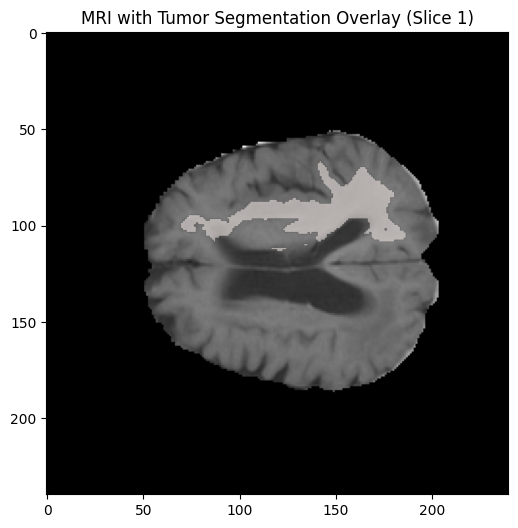

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load the HDF5 file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"

with h5py.File(h5_file, 'r') as f:
    image = f['image'][()]  # Load MRI scan
    mask = f['mask'][()]  # Load segmentation mask

# Use slice 1 (where the tumor is present)
slice_idx = 1

# Normalize MRI scan to range [0, 1]
image = image[:, :, slice_idx]
image = exposure.rescale_intensity(image, out_range=(0, 1))  # Improve contrast

# Ensure mask is binary (0s and 1s)
mask = mask[:, :, slice_idx]
mask = (mask > 0).astype(np.uint8)  # Convert to binary (0 or 1)

# Force the mask to be visible
mask_visible = np.ma.masked_where(mask == 0, mask)  # Hide background (0s)

# Plot MRI scan with tumor mask overlay
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')  # Display MRI
ax.imshow(mask_visible, cmap='Reds', alpha=0.5)  # Overlay mask in red
ax.set_title("MRI with Tumor Segmentation Overlay (Slice 1)")
plt.show()


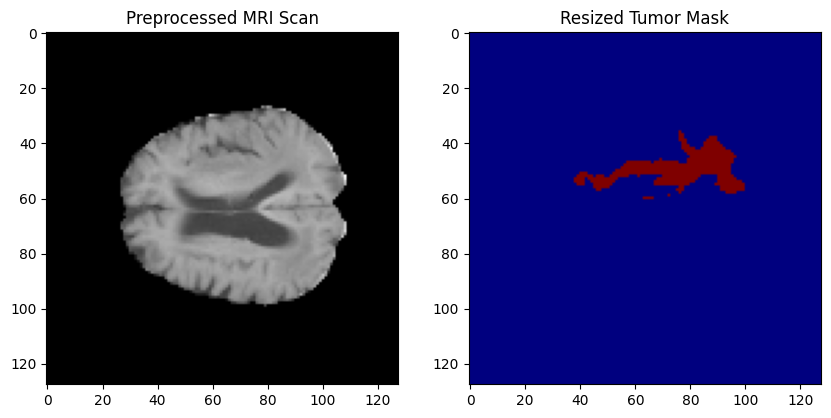

In [11]:
import h5py
import numpy as np
import cv2  # OpenCV for resizing
import matplotlib.pyplot as plt
from skimage import exposure

def load_preprocess_h5(h5_file, target_size=(128, 128)):
    """Loads and preprocesses an MRI image and its segmentation mask."""

    with h5py.File(h5_file, 'r') as f:
        image = f['image'][()]  # Load MRI scan
        mask = f['mask'][()]    # Load segmentation mask

    # Use slice 1 (where tumor is present)
    slice_idx = 1
    image = image[:, :, slice_idx]  # Extract the correct slice
    mask = mask[:, :, slice_idx]    # Extract corresponding mask

    # Normalize image (rescale intensity between 0-1)
    image = exposure.rescale_intensity(image, out_range=(0, 1))

    # Convert mask to binary (0 = background, 1 = tumor)
    mask = (mask > 0).astype(np.uint8)

    # Resize both image and mask to target size
    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)

    return image_resized, mask_resized

# Test with a sample file
h5_file = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data/volume_180_slice_92.h5"
img, msk = load_preprocess_h5(h5_file)

# Visualize resized data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Preprocessed MRI Scan")
ax[1].imshow(msk, cmap='jet')
ax[1].set_title("Resized Tumor Mask")
plt.show()


In [12]:
import matplotlib.pyplot as plt

# Visualizing the raw mask before any processing
plt.figure(figsize=(6, 6))
plt.imshow(sample_mask_np, cmap="gray")
plt.title("Raw Mask (Before Processing)")
plt.colorbar()
plt.show()


NameError: name 'sample_mask_np' is not defined

<Figure size 600x600 with 0 Axes>

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import h5py
import cv2
import numpy as np
from skimage import exposure

class BrainTumorDataset(Dataset):
    def __init__(self, dataset_path, target_size=(128, 128)):
        self.files = glob.glob(f"{dataset_path}/**/*.h5", recursive=True)
        self.target_size = target_size

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        h5_file = self.files[idx]

        with h5py.File(h5_file, 'r') as f:
            image = f['image'][()]  # Load MRI scan
            mask = f['mask'][()]    # Load segmentation mask

        # Use slice 1 (where the tumor is present)
        slice_idx = 1
        image = image[:, :, slice_idx]
        mask = mask[:, :, slice_idx]

        # Normalize image (rescale intensity between 0-1)
        image = exposure.rescale_intensity(image, out_range=(0, 1))

        # Convert mask to binary (0 = background, 1 = tumor)
        mask = (mask > 0).astype(np.uint8)

        # Resize both image and mask to target size
        image_resized = cv2.resize(image, self.target_size, interpolation=cv2.INTER_LINEAR)
        mask_resized = cv2.resize(mask, self.target_size, interpolation=cv2.INTER_NEAREST)

        # Convert to PyTorch tensors
        image_resized = torch.tensor(image_resized, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        mask_resized = torch.tensor(mask_resized, dtype=torch.long)  # Mask should be long for loss function

        return image_resized, mask_resized

# Initialize dataset & DataLoader
dataset_path = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data"
dataset = BrainTumorDataset(dataset_path)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Test the DataLoader
sample_img, sample_mask = next(iter(dataloader))

print("🧠 MRI Scan Batch Shape:", sample_img.shape)  # Expected: (4, 1, 128, 128)
print("🎭 Mask Batch Shape:", sample_mask.shape)  # Expected: (4, 128, 128)


🧠 MRI Scan Batch Shape: torch.Size([4, 1, 128, 128])
🎭 Mask Batch Shape: torch.Size([4, 128, 128])


In [14]:
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder (Downsampling)
        self.enc1 = self.conv_block(1, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        # Bottleneck
        self.bottleneck = self.conv_block(512, 1024)

        # Decoder (Upsampling)
        self.dec4 = self.conv_block(1024, 512)
        self.dec3 = self.conv_block(512, 256)
        self.dec2 = self.conv_block(256, 128)
        self.dec1 = self.conv_block(128, 64)

        # Final Output Layer
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        """Create a Convolutional Block with BatchNorm and ReLU"""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(F.max_pool2d(enc1, 2))
        enc3 = self.enc3(F.max_pool2d(enc2, 2))
        enc4 = self.enc4(F.max_pool2d(enc3, 2))

        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(enc4, 2))

        # Decoder (Ensure sizes match)
        dec4 = self.dec4(F.interpolate(bottleneck, size=enc4.shape[2:], mode='bilinear', align_corners=False))
        dec3 = self.dec3(F.interpolate(dec4, size=enc3.shape[2:], mode='bilinear', align_corners=False))
        dec2 = self.dec2(F.interpolate(dec3, size=enc2.shape[2:], mode='bilinear', align_corners=False))
        dec1 = self.dec1(F.interpolate(dec2, size=enc1.shape[2:], mode='bilinear', align_corners=False))

        # Final segmentation output
        return torch.sigmoid(self.final_conv(dec1))

# Initialize Model
model = UNet().to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ U-Net Model Fixed & Initialized!")


✅ U-Net Model Fixed & Initialized!


In [15]:
import torch.optim as optim

# Loss function (Dice Loss + BCE for better segmentation)
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, pred, target):
        smooth = 1.0
        pred = pred.view(-1)
        target = target.view(-1)
        intersection = (pred * target).sum()
        return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

# Optimizer & Loss
criterion = DiceLoss()  # Dice Loss for segmentation
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print("✅ Loss Function & Optimizer Set!")


✅ Loss Function & Optimizer Set!


In [17]:
print(f"Dataset size: {len(dataset)}")
print(f"Total batches per epoch: {len(dataloader)}")


Dataset size: 57195
Total batches per epoch: 14299


In [ ]:
from tqdm import tqdm  # Import tqdm for progress bar
import torch

# ✅ Updated GradScaler initialization (No warning)
scaler = torch.amp.GradScaler("cuda")

num_epochs = 10  # Ensure num_epochs is defined

# ✅ Ensure device is correctly set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Ensure dataset is loaded before DataLoader
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

def train_model():
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0

        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()

            # ✅ Corrected Mixed Precision Autocast
            with torch.autocast(device_type="cuda", dtype=torch.float16):
                outputs = model(images)
                loss = criterion(outputs.squeeze(1), masks.float())

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            epoch_loss += loss.item()

        print(f"🔥 Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

train_model()


Epoch 1/10:  51%|█████     | 1820/3575 [08:40<08:33,  3.42it/s]

In [ ]:
# from tqdm import tqdm  # Import tqdm for progress bar
# import torch

# scaler = torch.amp.GradScaler('cuda')  # Enables FP16 with latest PyTorch

# num_epochs = 10  # Ensure num_epochs is defined

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Ensure device is defined

# # Ensure train_loader is defined
# train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# def train_model():
#     for epoch in range(num_epochs):
#         model.train()
#         epoch_loss = 0.0

#         for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
#             images, masks = images.to(device), masks.to(device)

#             optimizer.zero_grad()

#             with torch.amp.autocast('cuda'):  # Updated for PyTorch 2.x
#                 outputs = model(images)
#                 loss = criterion(outputs.squeeze(1), masks.float())

#             scaler.scale(loss).backward()
#             scaler.step(optimizer)
#             scaler.update()

#             epoch_loss += loss.item()

#         print(f"🔥 Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

# train_model()

In [ ]:
torch.save(model.state_dict(), "unet_brain_tumor_fp16.pth")
print("✅ Model saved successfully!")


In [ ]:
from google.colab import files
files.download("unet_brain_tumor_fp16.pth")


In [ ]:
import numpy as np

print("🎭 Unique Mask Values:", np.unique(sample_mask_np))
print("🛠️ Tumor Pixels Count:", (sample_mask_np > 0).sum())


In [ ]:
plt.imshow(sample_mask_np, cmap="gray", vmin=0, vmax=1)


In [ ]:
import torch
import matplotlib.pyplot as plt

sample_img, sample_mask = next(iter(test_loader))

# Convert tensors to NumPy for visualization
sample_img_np = sample_img[0].cpu().numpy().squeeze()
sample_mask_np = sample_mask[0].cpu().numpy().squeeze()

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(sample_img_np, cmap="gray")
plt.title("MRI Scan")
plt.subplot(1,2,2)
plt.imshow(sample_mask_np, cmap="gray")
plt.title("Ground Truth Mask")
plt.show()

print("🎭 Unique Mask Values:", torch.unique(sample_mask))  # Should be [0, 1] or more classes


In [ ]:
from torch.utils.data import DataLoader, random_split

# Define dataset path (same as training but for test split)
dataset_path = "/root/.cache/kagglehub/datasets/awsaf49/brats2020-training-data/versions/3/BraTS2020_training_data/content/data"

# Load the full dataset
dataset = BrainTumorDataset(dataset_path)

# Split dataset into train & test sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

print(f"✅ Test DataLoader Ready! Test Samples: {len(test_dataset)}")


In [ ]:
model.eval()  # Set model to evaluation mode

sample_img, sample_mask = next(iter(test_loader))
sample_img = sample_img.to(device)

with torch.no_grad():
    pred_mask = model(sample_img)
    pred_mask = (pred_mask.squeeze(1) > 0.5).float()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].imshow(sample_img[0].cpu().squeeze(), cmap="gray")
axes[0].set_title("MRI Scan")
axes[1].imshow(sample_mask[0].cpu(), cmap="gray")
axes[1].set_title("Ground Truth Mask")
axes[2].imshow(pred_mask[0].cpu(), cmap="gray")
axes[2].set_title("Predicted Mask")
plt.show()
